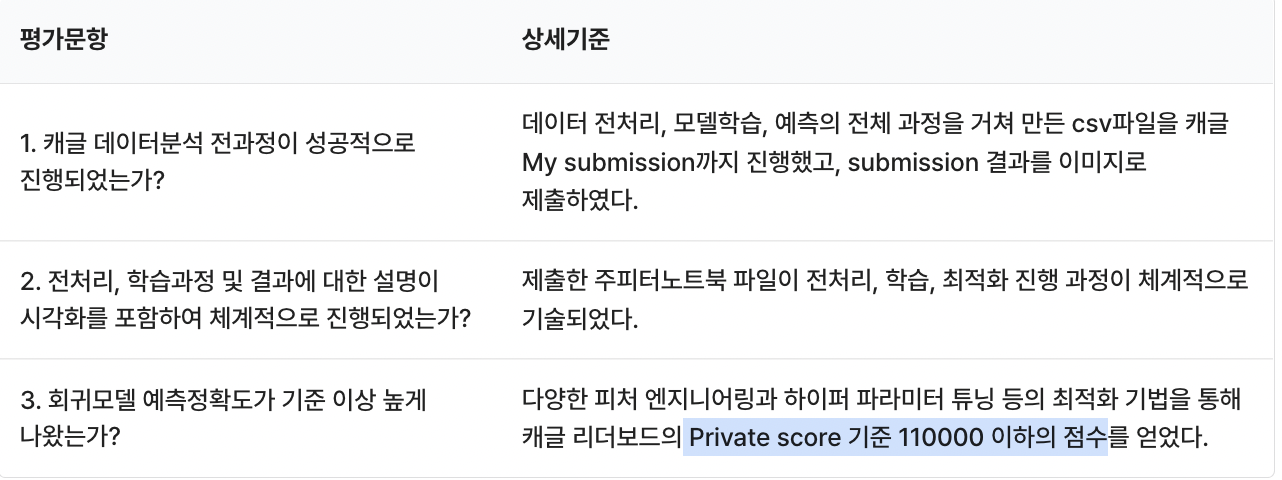

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [467]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')   

In [468]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)

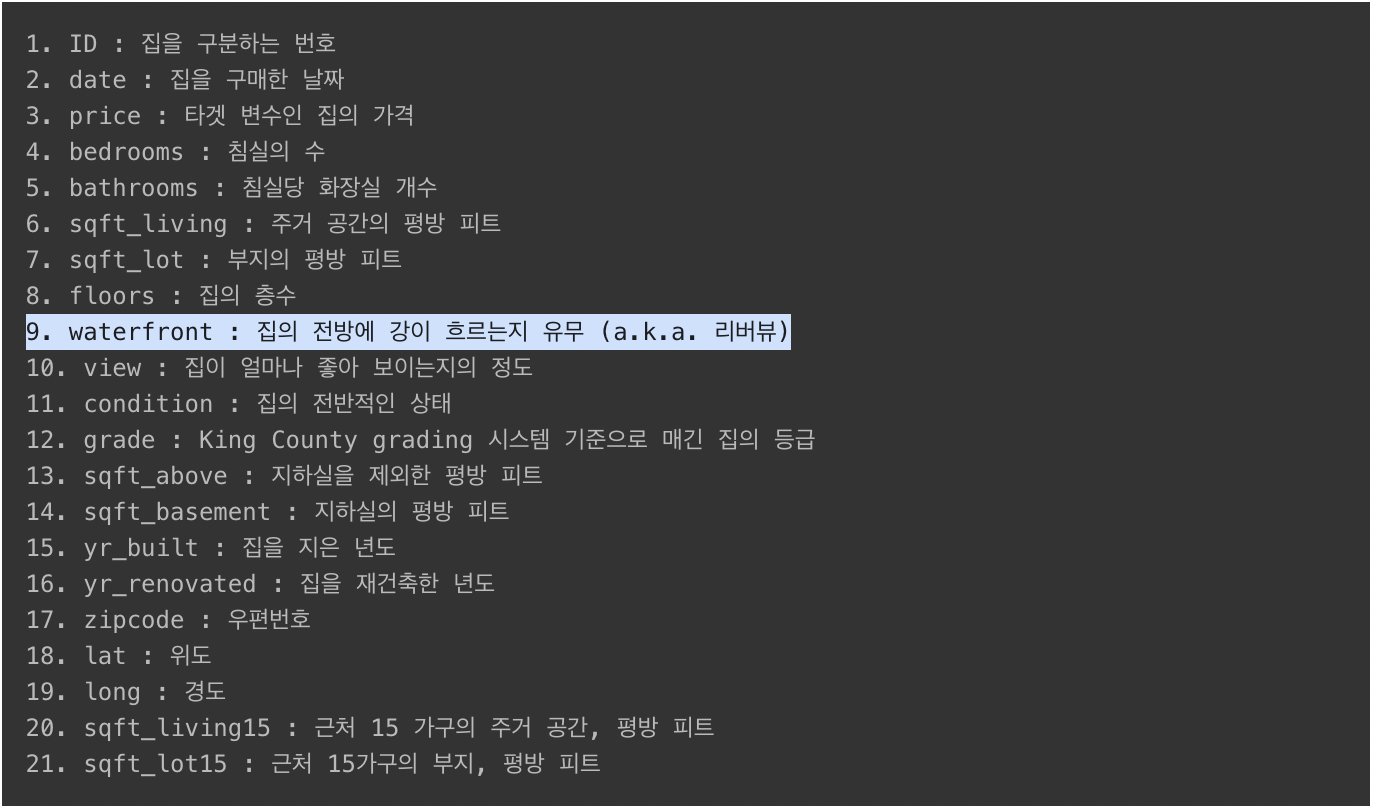

In [6]:
data.info()
print("-_" * 10)
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [377]:
data

id             date      price  bedrooms  bathrooms  sqft_living  \
0          0  20141013T000000   221900.0         3       1.00         1180   
1          1  20150225T000000   180000.0         2       1.00          770   
2          2  20150218T000000   510000.0         3       2.00         1680   
3          3  20140627T000000   257500.0         3       2.25         1715   
4          4  20150115T000000   291850.0         3       1.50         1060   
...      ...              ...        ...       ...        ...          ...   
15030  15030  20141014T000000   610685.0         4       2.50         2520   
15031  15031  20150326T000000  1007500.0         4       3.50         3510   
15032  15032  20140521T000000   360000.0         3       2.50         1530   
15033  15033  20150223T000000   400000.0         4       2.50         2310   
15034  15034  20141015T000000   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1         10000     1.0           0     0  ...      6         770   
2          8080     1.0           0     0  ...      8        1680   
3          6819     2.0           0     0  ...      7        1715   
4          9711     1.0           0     0  ...      7        1060   
...         ...     ...         ...   ...  ...    ...         ...   
15030      6023     2.0           0     0  ...      9        2520   
15031      7200     2.0           0     0  ...      9        2600   
15032      1131     3.0           0     0  ...      8        1530   
15033      5813     2.0           0     0  ...      8        2310   
15034      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                  0      1933             0    98028  47.7379 -122.233   
2                  0      1987             0    98074  47.6168 -122.045   
3                  0      1995             0    98003  47.3097 -122.327   
4                  0      1963             0    98198  47.4095 -122.315   
...              ...       ...           ...      ...      ...      ...   
15030              0      2014             0    98056  47.5137 -122.167   
15031            910      2009             0    98136  47.5537 -122.398   
15032              0      2009             0    98103  47.6993 -122.346   
15033              0      2014             0    98146  47.5107 -122.362   
15034              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               2720        8062  
2               1800        7503  
3               2238        6819  
4               1650        9711  
...              ...         ...  
15030           2520        6023  
15031           2050        6200  
15032           1530        1509  
15033           1830        7200  
15034           1020        1357  

[15035 rows x 21 columns]

In [378]:
sub

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     15035  20141209T000000         3       2.25         2570      7242   
1     15036  20141209T000000         4       3.00         1960      5000   
2     15037  20140512T000000         4       4.50         5420    101930   
3     15038  20150415T000000         3       1.00         1780      7470   
4     15039  20150312T000000         3       2.50         1890      6560   
...     ...              ...       ...        ...          ...       ...   
6463  21498  20140626T000000         3       1.75         1500     11968   
6464  21499  20150126T000000         3       2.00         1490      1126   
6465  21500  20150219T000000         3       2.50         1310      1294   
6466  21501  20140623T000000         2       0.75         1020      1350   
6467  21502  20150116T000000         3       2.50         1600      2388   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0        2.0           0     0          3      7        2170            400   
1        1.0           0     0          5      7        1050            910   
2        1.0           0     0          3     11        3890           1530   
3        1.0           0     0          3      7        1050            730   
4        2.0           0     0          3      7        1890              0   
...      ...         ...   ...        ...    ...         ...            ...   
6463     1.0           0     0          3      6        1500              0   
6464     3.0           0     0          3      8        1490              0   
6465     2.0           0     0          3      8        1180            130   
6466     2.0           0     0          3      7        1020              0   
6467     2.0           0     0          3      8        1600              0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0         1951          1991    98125  47.7210 -122.319           1690   
1         1965             0    98136  47.5208 -122.393           1360   
2         2001             0    98053  47.6561 -122.005           4760   
3         1960             0    98146  47.5123 -122.337           1780   
4         2003             0    98038  47.3684 -122.031           2390   
...        ...           ...      ...      ...      ...            ...   
6463      2014             0    98010  47.3095 -122.002           1320   
6464      2014             0    98144  47.5699 -122.288           1400   
6465      2008             0    98116  47.5773 -122.409           1330   
6466      2009             0    98144  47.5944 -122.299           1020   
6467      2004             0    98027  47.5345 -122.069           1410   

      sqft_lot15  
0           7639  
1           5000  
2         101930  
3           8113  
4           7570  
...          ...  
6463       11303  
6464        1230  
6465        1265  
6466        2007  
6467        1287  

[6468 rows x 20 columns]

In [469]:
sub_id = data["id"]

In [470]:
y = data['price']
del data['price']
del data["id"]
del sub["id"]

In [471]:
data = pd.concat((data, sub), axis=0)

In [341]:
data

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     20141013T000000         3       1.00         1180      5650     1.0   
1     20150225T000000         2       1.00          770     10000     1.0   
2     20150218T000000         3       2.00         1680      8080     1.0   
3     20140627T000000         3       2.25         1715      6819     2.0   
4     20150115T000000         3       1.50         1060      9711     1.0   
...               ...       ...        ...          ...       ...     ...   
6463  20140626T000000         3       1.75         1500     11968     1.0   
6464  20150126T000000         3       2.00         1490      1126     3.0   
6465  20150219T000000         3       2.50         1310      1294     2.0   
6466  20140623T000000         2       0.75         1020      1350     2.0   
6467  20150116T000000         3       2.50         1600      2388     2.0   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0              0     0          3      7        1180              0      1955   
1              0     0          3      6         770              0      1933   
2              0     0          3      8        1680              0      1987   
3              0     0          3      7        1715              0      1995   
4              0     0          3      7        1060              0      1963   
...          ...   ...        ...    ...         ...            ...       ...   
6463           0     0          3      6        1500              0      2014   
6464           0     0          3      8        1490              0      2014   
6465           0     0          3      8        1180            130      2008   
6466           0     0          3      7        1020              0      2009   
6467           0     0          3      8        1600              0      2004   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                0    98178  47.5112 -122.257           1340        5650  
1                0    98028  47.7379 -122.233           2720        8062  
2                0    98074  47.6168 -122.045           1800        7503  
3                0    98003  47.3097 -122.327           2238        6819  
4                0    98198  47.4095 -122.315           1650        9711  
...            ...      ...      ...      ...            ...         ...  
6463             0    98010  47.3095 -122.002           1320       11303  
6464             0    98144  47.5699 -122.288           1400        1230  
6465             0    98116  47.5773 -122.409           1330        1265  
6466             0    98144  47.5944 -122.299           1020        2007  
6467             0    98027  47.5345 -122.069           1410        1287  

[21503 rows x 19 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21503 non-null  object 
 1   bedrooms       21503 non-null  int64  
 2   bathrooms      21503 non-null  float64
 3   sqft_living    21503 non-null  int64  
 4   sqft_lot       21503 non-null  int64  
 5   floors         21503 non-null  float64
 6   waterfront     21503 non-null  int64  
 7   view           21503 non-null  int64  
 8   condition      21503 non-null  int64  
 9   grade          21503 non-null  int64  
 10  sqft_above     21503 non-null  int64  
 11  sqft_basement  21503 non-null  int64  
 12  yr_built       21503 non-null  int64  
 13  yr_renovated   21503 non-null  int64  
 14  zipcode        21503 non-null  int64  
 15  lat            21503 non-null  float64
 16  long           21503 non-null  float64
 17  sqft_living15  21503 non-null  int64  
 18  sqft_lo

In [12]:
data.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.515857     0.576623  0.031621  0.175088   
bathrooms      0.515857   1.000000     0.754592  0.087289  0.500264   
sqft_living    0.576623   0.754592     1.000000  0.171984  0.353615   
sqft_lot       0.031621   0.087289     0.171984  1.000000 -0.005655   
floors         0.175088   0.500264     0.353615 -0.005655  1.000000   
waterfront    -0.006686   0.063774     0.103912  0.021609  0.023616   
view           0.078975   0.186864     0.283942  0.075066  0.028927   
condition      0.027060  -0.126481    -0.060226 -0.009132 -0.265105   
grade          0.356887   0.664841     0.762421  0.112687  0.458134   
sqft_above     0.477391   0.685116     0.876625  0.182622  0.523414   
sqft_basement  0.303213   0.283783     0.434663  0.015131 -0.245757   
yr_built       0.153421   0.505297     0.317161  0.052653  0.489180   
yr_renovated   0.018538   0.050667     0.055090  0.007643  0.005818   
zipcode       -0.152680  -0.203312    -0.198704 -0.129338 -0.058818   
lat           -0.009572   0.024256     0.051885 -0.085805  0.049635   
long           0.129194   0.222241     0.239451  0.229464  0.124843   
sqft_living15  0.391787   0.568584     0.756189  0.143708  0.279891   
sqft_lot15     0.028974   0.086812     0.182769  0.718115 -0.011636   

               waterfront      view  condition     grade  sqft_above  \
bedrooms        -0.006686  0.078975   0.027060  0.356887    0.477391   
bathrooms        0.063774  0.186864  -0.126481  0.664841    0.685116   
sqft_living      0.103912  0.283942  -0.060226  0.762421    0.876625   
sqft_lot         0.021609  0.075066  -0.009132  0.112687    0.182622   
floors           0.023616  0.028927  -0.265105  0.458134    0.523414   
waterfront       1.000000  0.402785   0.016676  0.082891    0.072081   
view             0.402785  1.000000   0.045832  0.250456    0.167323   
condition        0.016676  0.045832   1.000000 -0.146824   -0.159739   
grade            0.082891  0.250456  -0.146824  1.000000    0.756071   
sqft_above       0.072081  0.167323  -0.159739  0.756071    1.000000   
sqft_basement    0.080750  0.276123   0.173985  0.167226   -0.052306   
yr_built        -0.026378 -0.054508  -0.363437  0.446158    0.423342   
yr_renovated     0.092871  0.103318  -0.061173  0.013995    0.022923   
zipcode          0.030440  0.086277   0.003821 -0.183607   -0.260537   
lat             -0.014348  0.005827  -0.015746  0.113886   -0.001123   
long            -0.042085 -0.079305  -0.107363  0.197342    0.343223   
sqft_living15    0.086574  0.279609  -0.094074  0.712910    0.731957   
sqft_lot15       0.030728  0.072906  -0.003539  0.118451    0.193421   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
bedrooms            0.303213  0.153421      0.018538 -0.152680 -0.009572   
bathrooms           0.283783  0.505297      0.050667 -0.203312  0.024256   
sqft_living         0.434663  0.317161      0.055090 -0.198704  0.051885   
sqft_lot            0.015131  0.052653      0.007643 -0.129338 -0.085805   
floors             -0.245757  0.489180      0.005818 -0.058818  0.049635   
waterfront          0.080750 -0.026378      0.092871  0.030440 -0.014348   
view                0.276123 -0.054508      0.103318  0.086277  0.005827   
condition           0.173985 -0.363437     -0.061173  0.003821 -0.015746   
grade               0.167226  0.446158      0.013995 -0.183607  0.113886   
sqft_above         -0.052306  0.423342      0.022923 -0.260537 -0.001123   
sqft_basement       1.000000 -0.134112      0.071429  0.075245  0.109783   
yr_built           -0.134112  1.000000     -0.225682 -0.346364 -0.148113   
yr_renovated        0.071429 -0.225682      1.000000  0.064762  0.029228   
zipcode             0.075245 -0.346364      0.064762  1.000000  0.266695   
lat                 0.109783 -0.148113      0.029228  0.266695  1.000000   
long               -0.145439  0.409026     -0.068958 -0.564271 -0.135928   
sqft

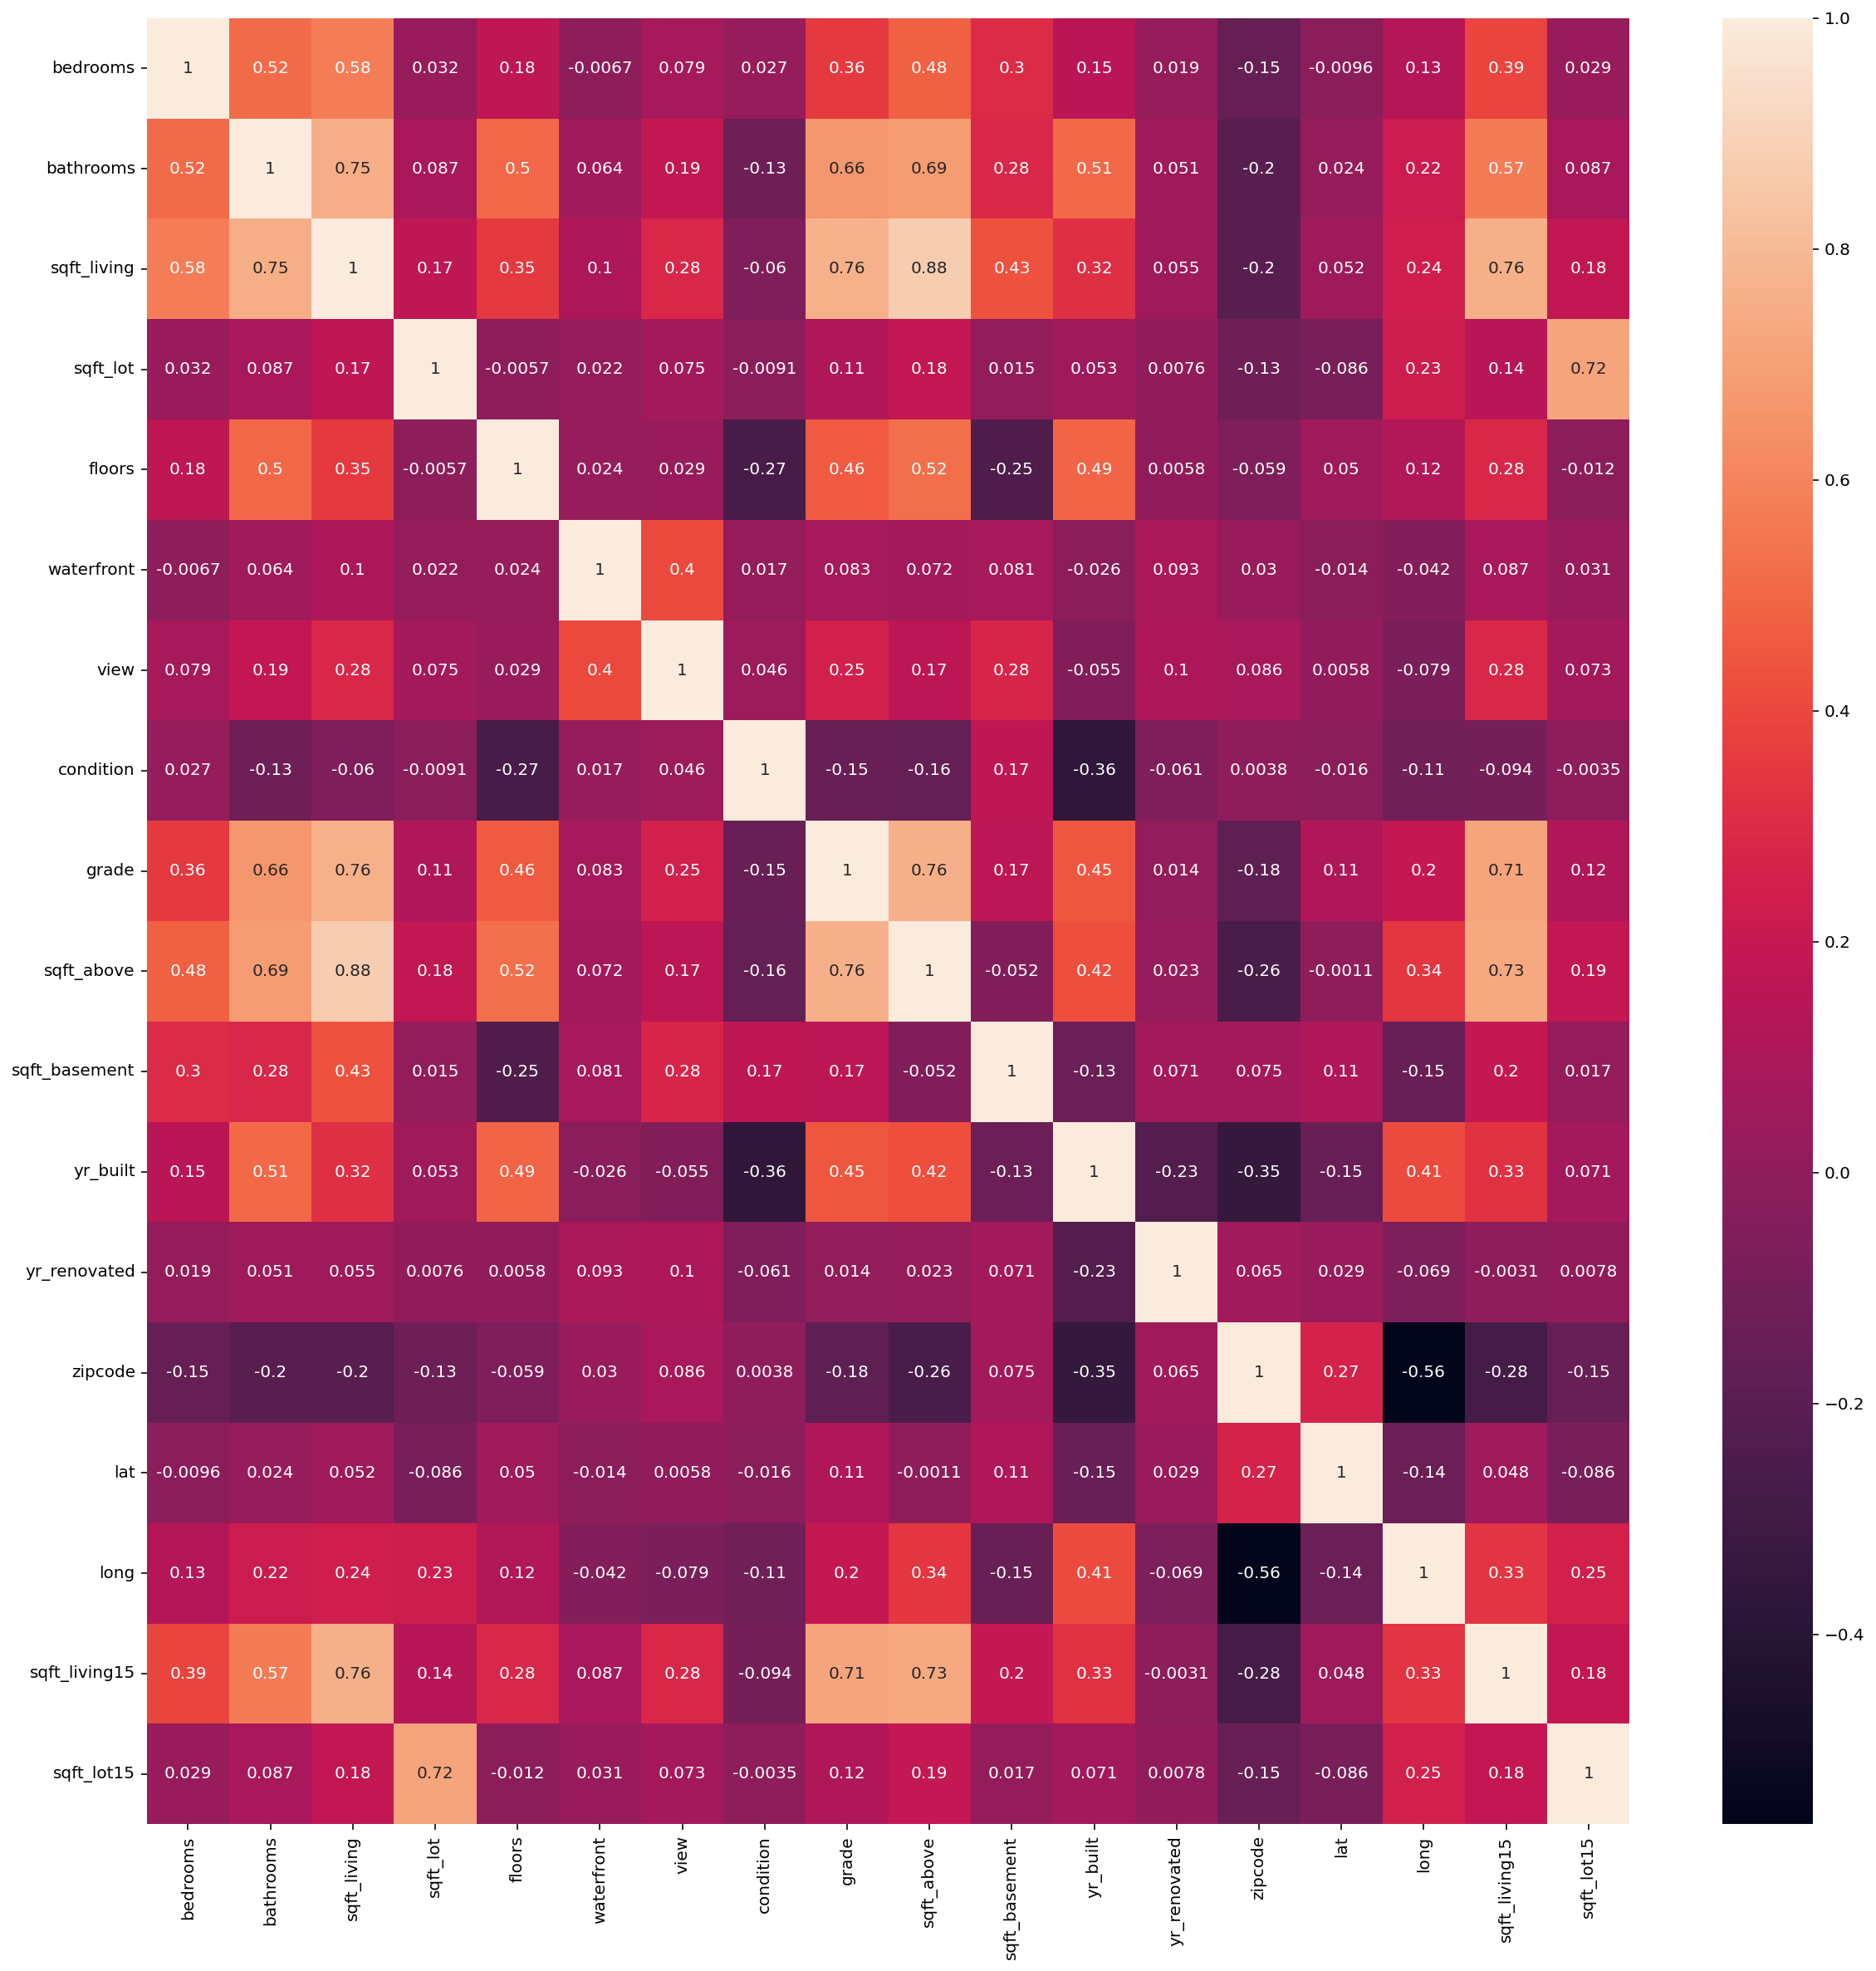

In [13]:
plt.figure(figsize= (20, 20))
sns.heatmap(data.corr(), annot= True);

del data["zipcode"]
del data['long']
del sub['zipcode']
del sub['long']

In [14]:
data.isnull().sum().sum()

0

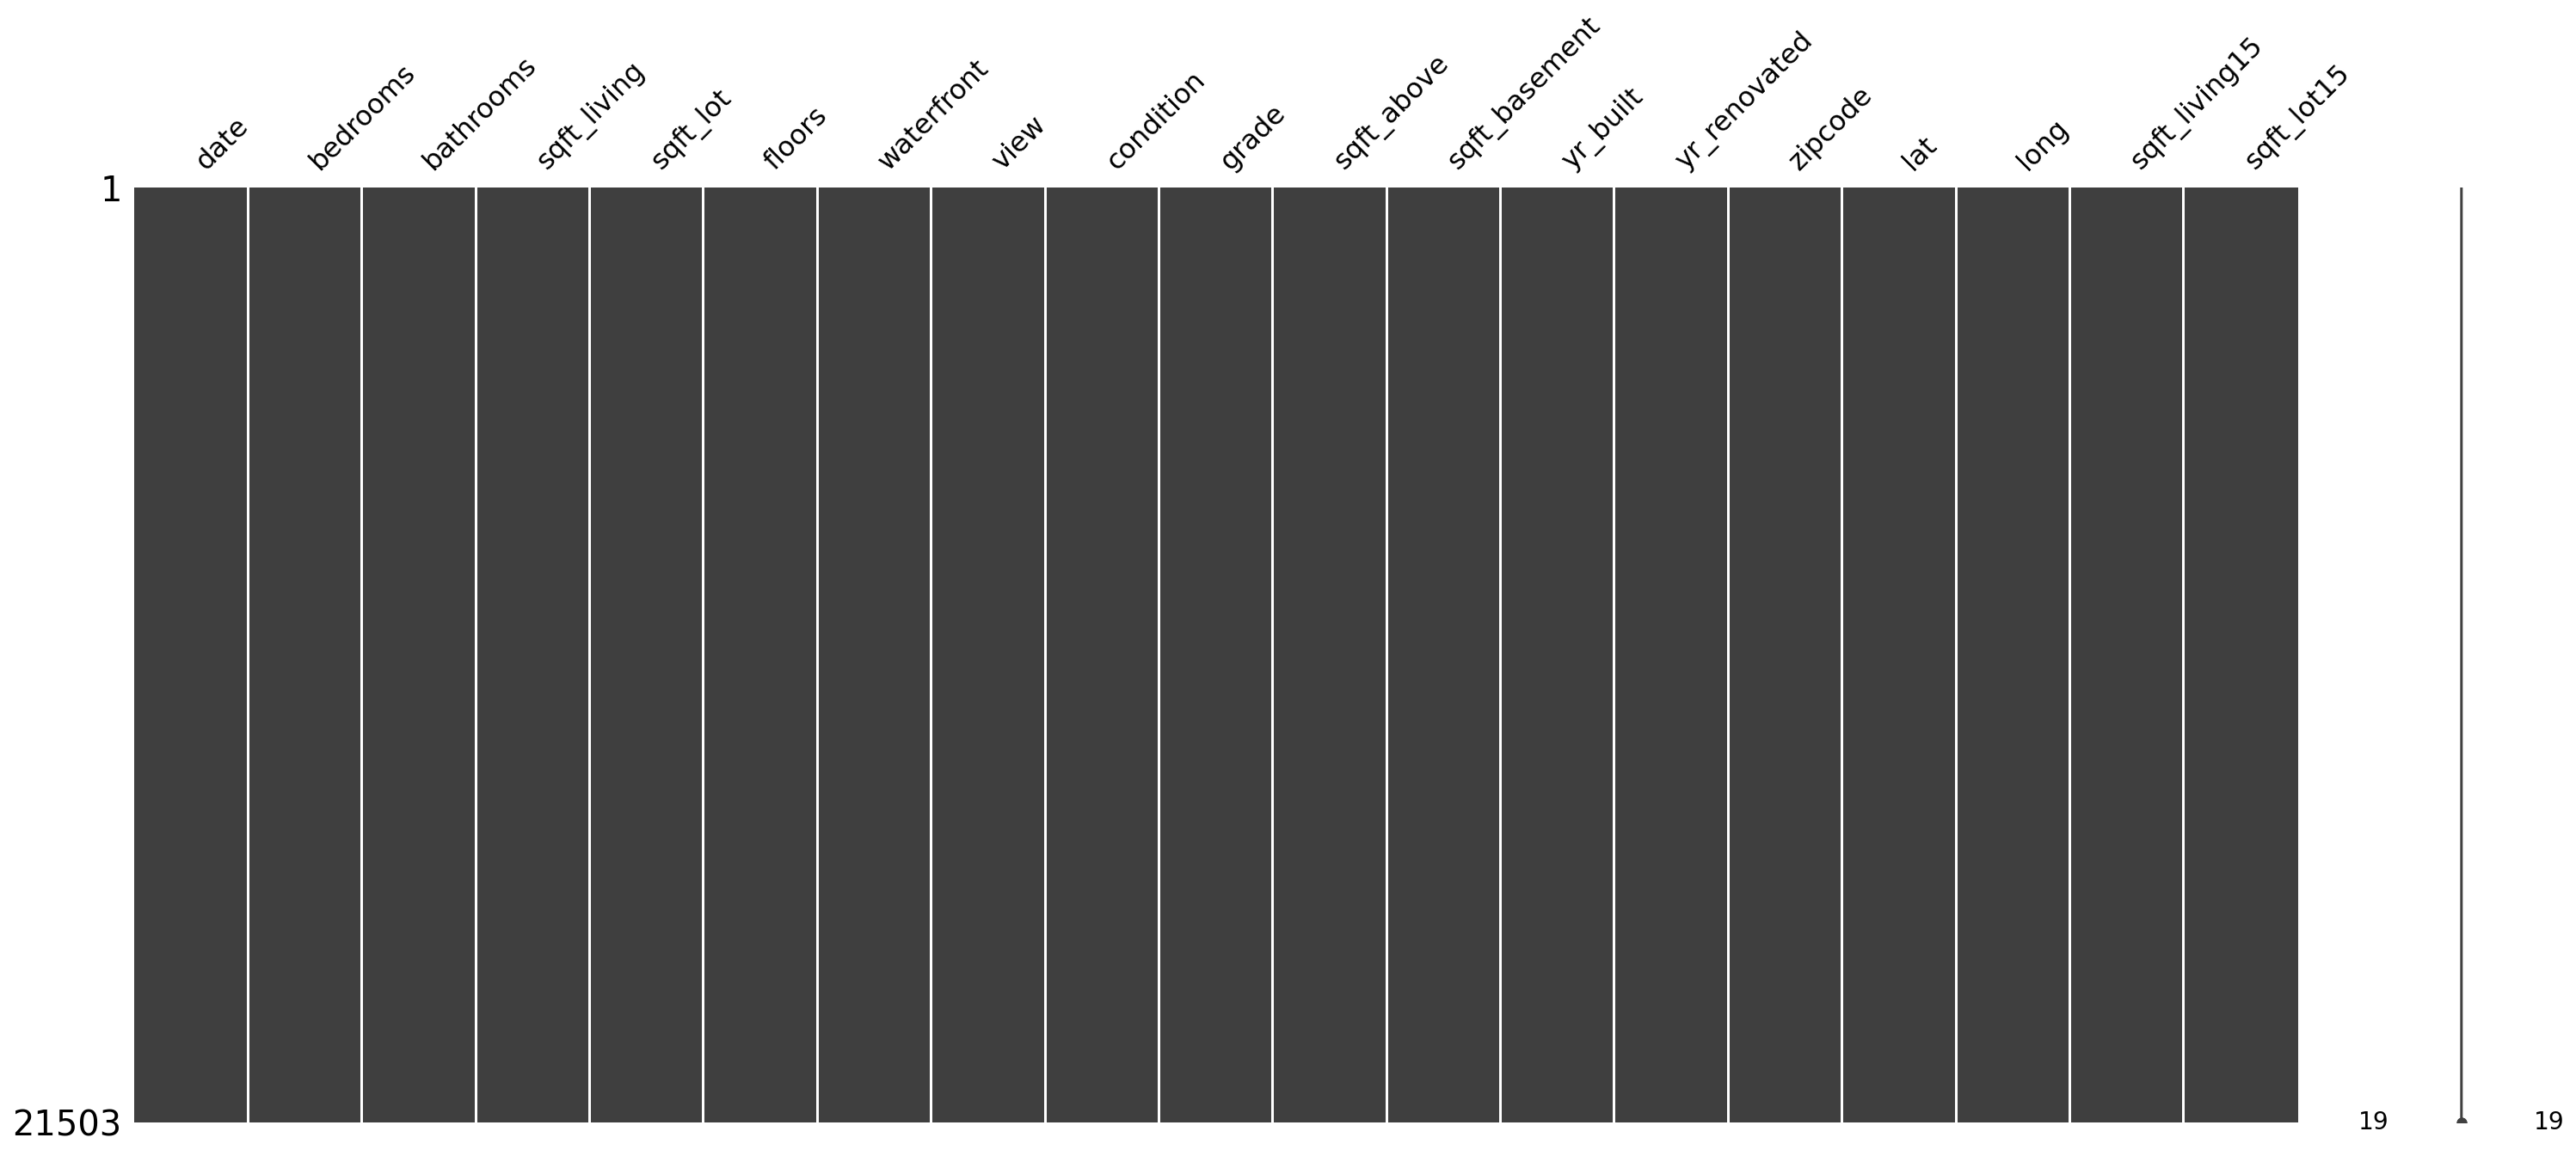

In [15]:
msno.matrix(data);

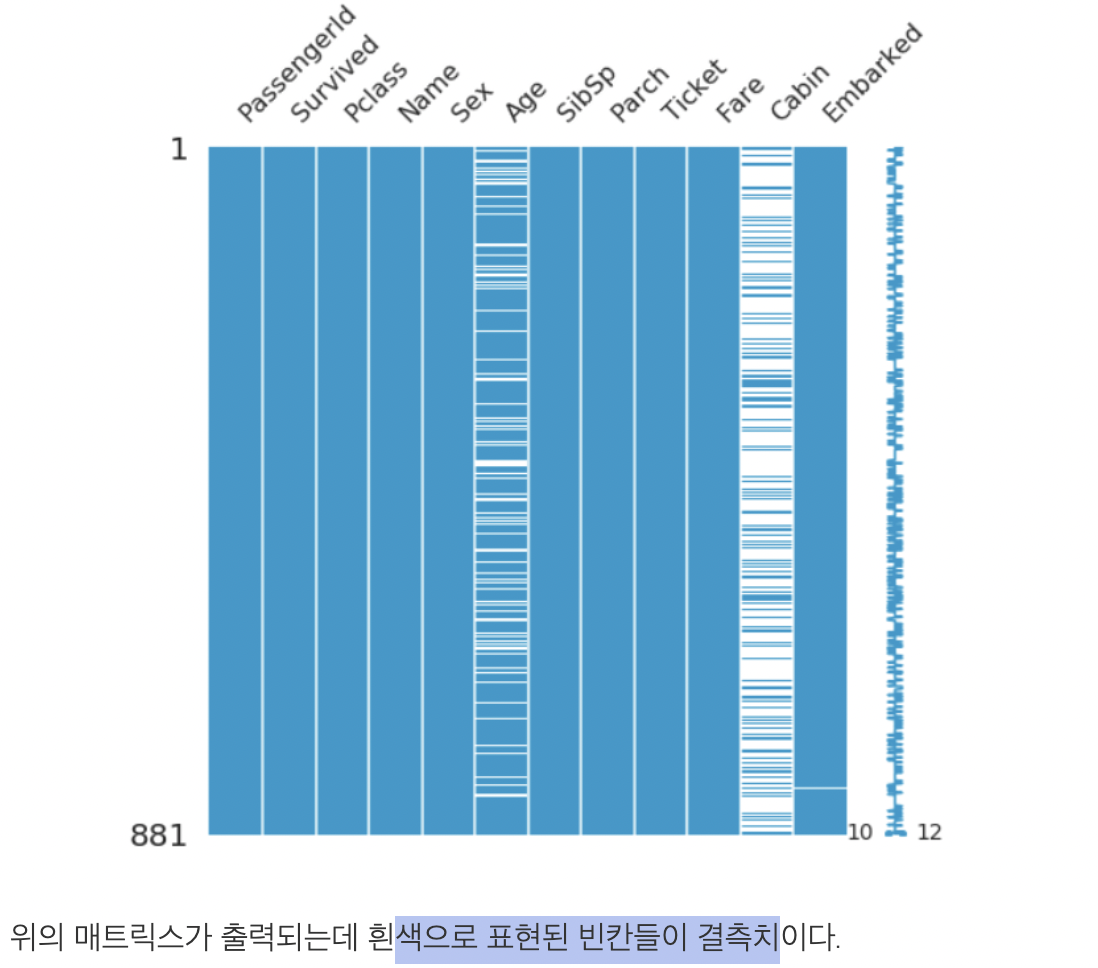

In [472]:
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21503 non-null  int64  
 1   bedrooms       21503 non-null  int64  
 2   bathrooms      21503 non-null  float64
 3   sqft_living    21503 non-null  int64  
 4   sqft_lot       21503 non-null  int64  
 5   floors         21503 non-null  float64
 6   waterfront     21503 non-null  int64  
 7   view           21503 non-null  int64  
 8   condition      21503 non-null  int64  
 9   grade          21503 non-null  int64  
 10  sqft_above     21503 non-null  int64  
 11  sqft_basement  21503 non-null  int64  
 12  yr_built       21503 non-null  int64  
 13  yr_renovated   21503 non-null  int64  
 14  zipcode        21503 non-null  int64  
 15  lat            21503 non-null  float64
 16  long           21503 non-null  float64
 17  sqft_living15  21503 non-null  int64  
 18  sqft_lo

In [18]:
data

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201410         3       1.00         1180      5650     1.0           0   
1     201502         2       1.00          770     10000     1.0           0   
2     201502         3       2.00         1680      8080     1.0           0   
3     201406         3       2.25         1715      6819     2.0           0   
4     201501         3       1.50         1060      9711     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406         3       1.75         1500     11968     1.0           0   
6464  201501         3       2.00         1490      1126     3.0           0   
6465  201502         3       2.50         1310      1294     2.0           0   
6466  201406         2       0.75         1020      1350     2.0           0   
6467  201501         3       2.50         1600      2388     2.0           0   

      view  condition  grade  sqft_above  sqft_basement  yr_built  \
0        0          3      7        1180              0      1955   
1        0          3      6         770              0      1933   
2        0          3      8        1680              0      1987   
3        0          3      7        1715              0      1995   
4        0          3      7        1060              0      1963   
...    ...        ...    ...         ...            ...       ...   
6463     0          3      6        1500              0      2014   
6464     0          3      8        1490              0      2014   
6465     0          3      8        1180            130      2008   
6466     0          3      7        1020              0      2009   
6467     0          3      8        1600              0      2004   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                0    98178  47.5112 -122.257           1340        5650  
1                0    98028  47.7379 -122.233           2720        8062  
2                0    98074  47.6168 -122.045           1800        7503  
3                0    98003  47.3097 -122.327           2238        6819  
4                0    98198  47.4095 -122.315           1650        9711  
...            ...      ...      ...      ...            ...         ...  
6463             0    98010  47.3095 -122.002           1320       11303  
6464             0    98144  47.5699 -122.288           1400        1230  
6465             0    98116  47.5773 -122.409           1330        1265  
6466             0    98144  47.5944 -122.299           1020        2007  
6467             0    98027  47.5345 -122.069           1410        1287  

[21503 rows x 19 columns]

In [344]:
sns.set(style= "whitegrid")

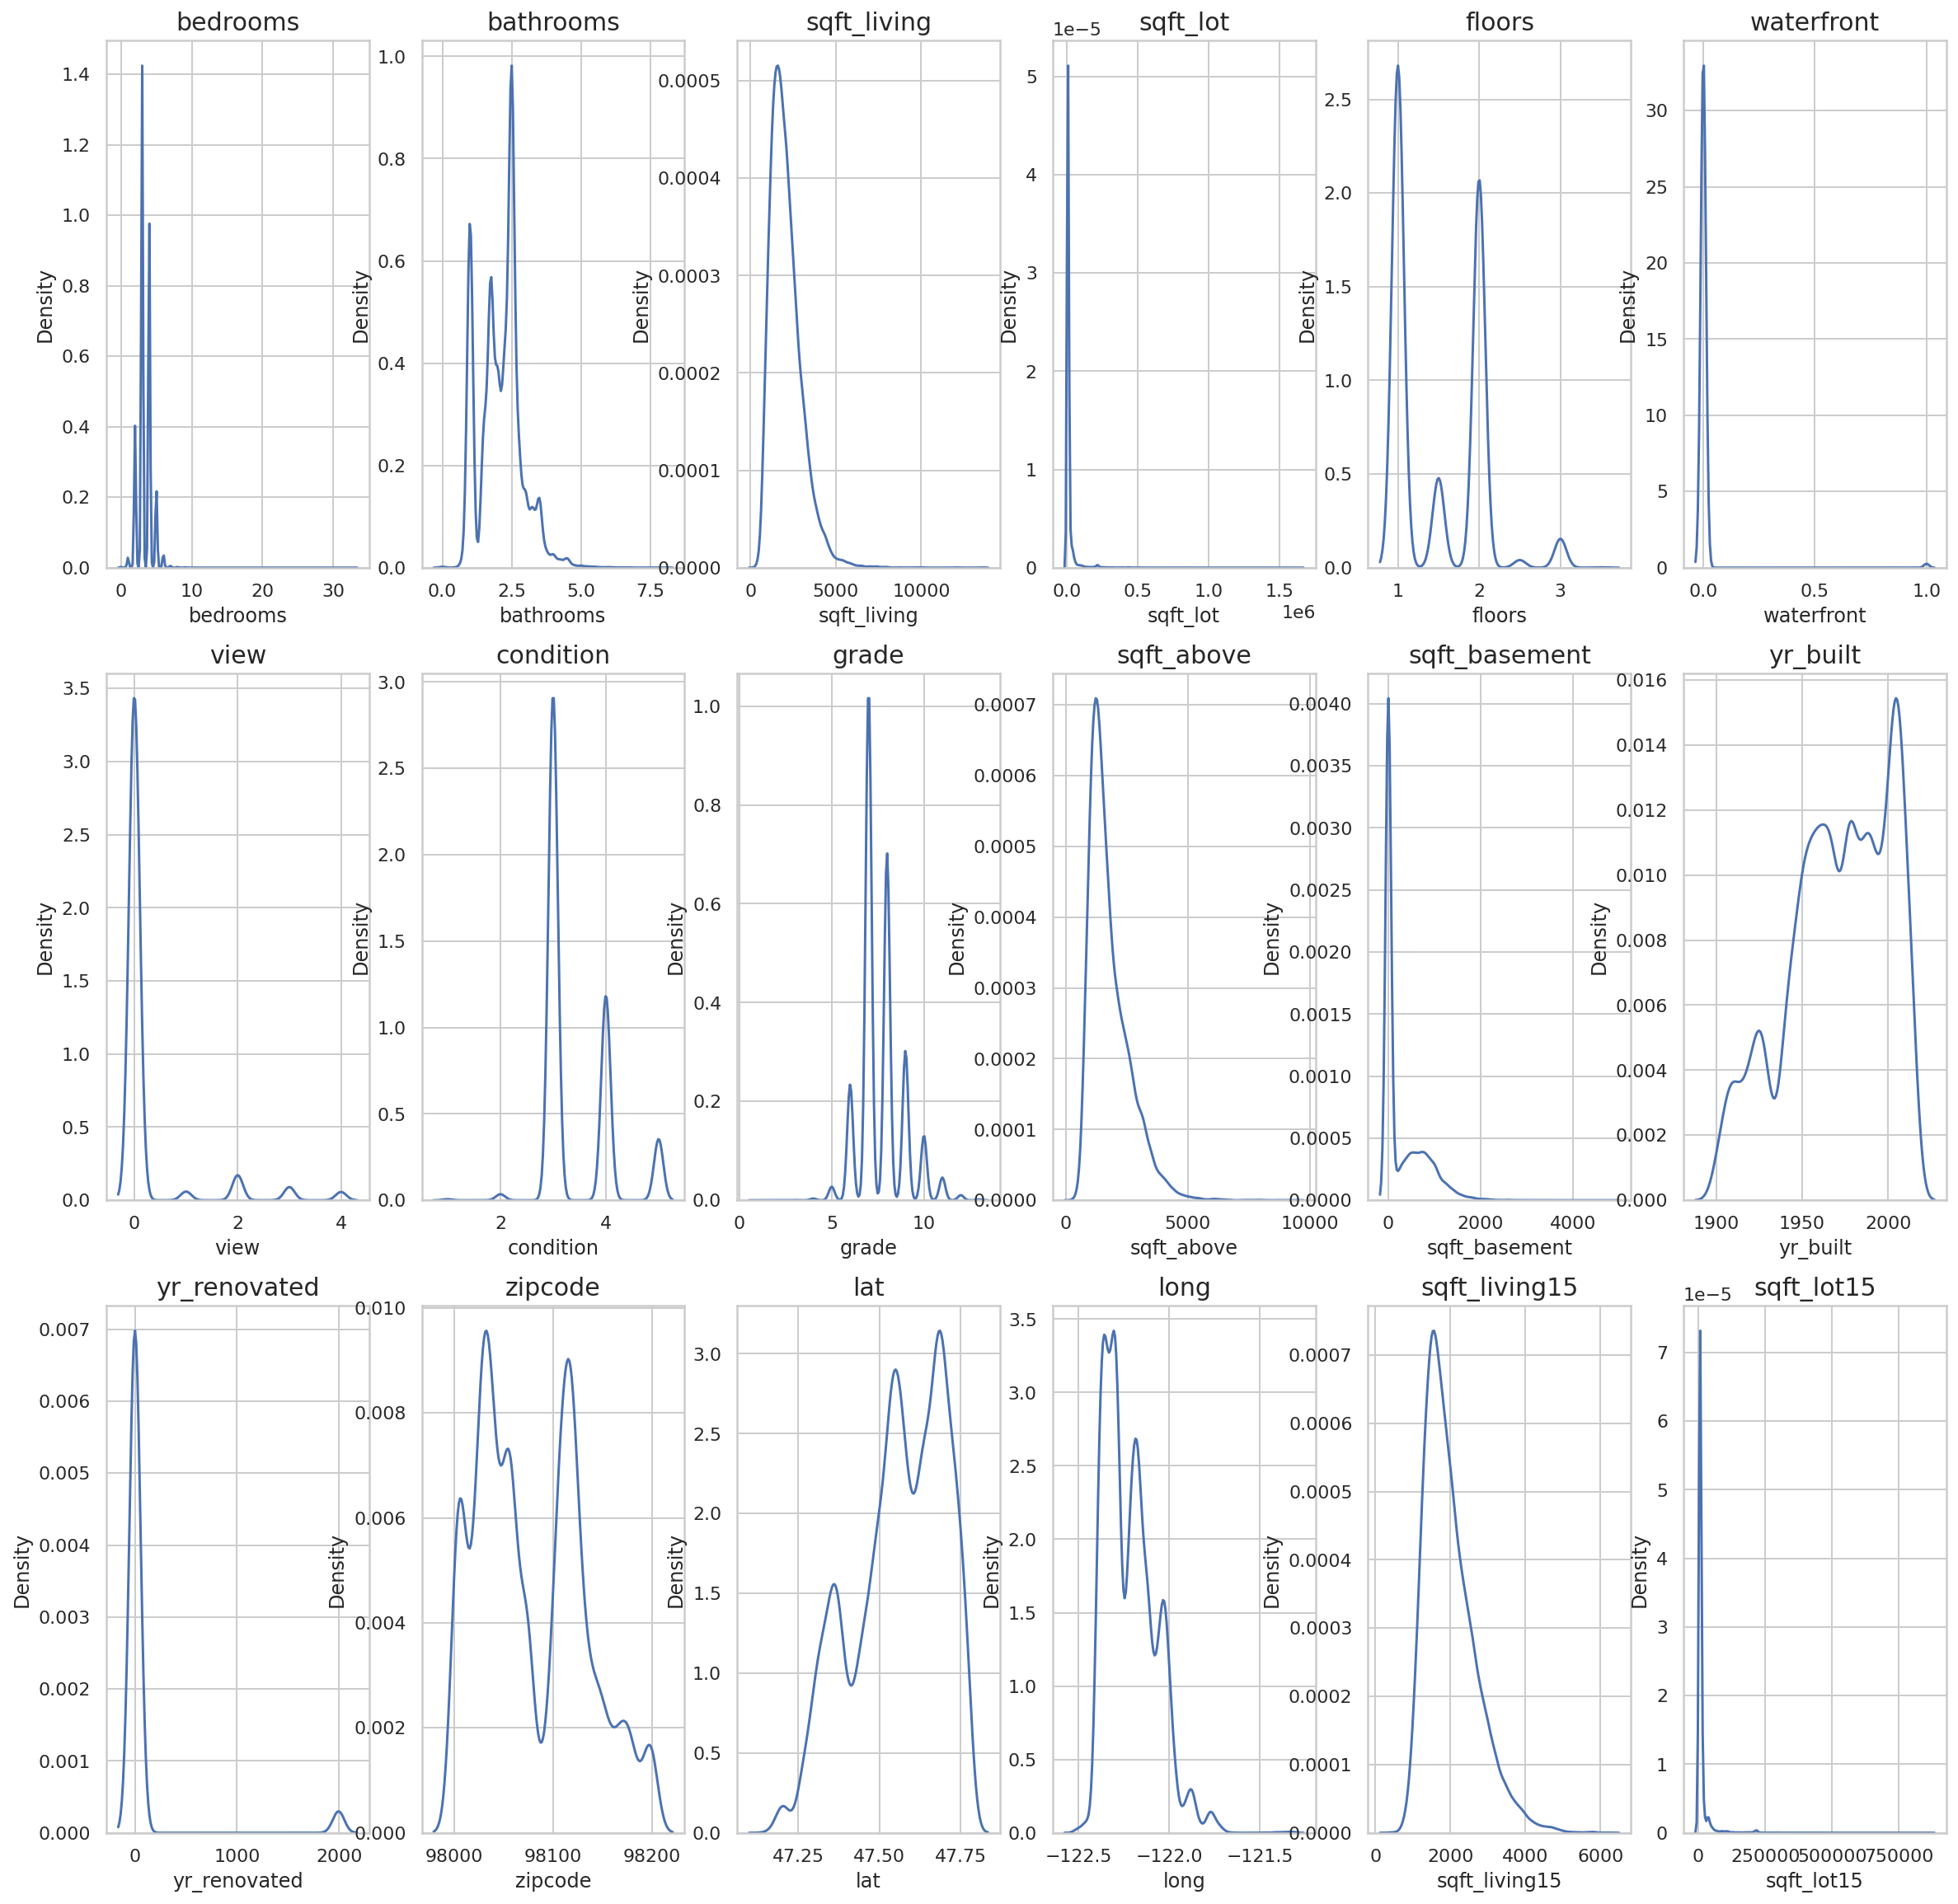

In [20]:
fig, ax = plt.subplots(3, 6, figsize=(20, 20))
# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(3):
    for col in range(6):
        sns.kdeplot(data= data[columns[count]], ax= ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [21]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

In [22]:
data

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201410  1.386294       1.00     7.074117  8.639588     1.0           0   
1     201502  1.098612       1.00     6.647688  9.210440     1.0           0   
2     201502  1.386294       2.00     7.427144  8.997271     1.0           0   
3     201406  1.386294       2.25     7.447751  8.827615     2.0           0   
4     201501  1.386294       1.50     6.966967  9.181118     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406  1.386294       1.75     7.313887  9.390075     1.0           0   
6464  201501  1.386294       2.00     7.307202  7.027315     3.0           0   
6465  201502  1.386294       2.50     7.178545  7.166266     2.0           0   
6466  201406  1.098612       0.75     6.928538  7.208600     2.0           0   
6467  201501  1.386294       2.50     7.378384  7.778630     2.0           0   

      view  condition  grade  sqft_above  sqft_basement  yr_built  \
0        0          3      7    7.074117       0.000000      1955   
1        0          3      6    6.647688       0.000000      1933   
2        0          3      8    7.427144       0.000000      1987   
3        0          3      7    7.447751       0.000000      1995   
4        0          3      7    6.966967       0.000000      1963   
...    ...        ...    ...         ...            ...       ...   
6463     0          3      6    7.313887       0.000000      2014   
6464     0          3      8    7.307202       0.000000      2014   
6465     0          3      8    7.074117       4.875197      2008   
6466     0          3      7    6.928538       0.000000      2009   
6467     0          3      8    7.378384       0.000000      2004   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                0    98178  47.5112 -122.257       7.201171    8.639588  
1                0    98028  47.7379 -122.233       7.908755    8.995041  
2                0    98074  47.6168 -122.045       7.496097    8.923191  
3                0    98003  47.3097 -122.327       7.713785    8.827615  
4                0    98198  47.4095 -122.315       7.409136    9.181118  
...            ...      ...      ...      ...            ...         ...  
6463             0    98010  47.3095 -122.002       7.186144    9.332912  
6464             0    98144  47.5699 -122.288       7.244942    7.115582  
6465             0    98116  47.5773 -122.409       7.193686    7.143618  
6466             0    98144  47.5944 -122.299       6.928538    7.604894  
6467             0    98027  47.5345 -122.069       7.252054    7.160846  

[21503 rows x 19 columns]

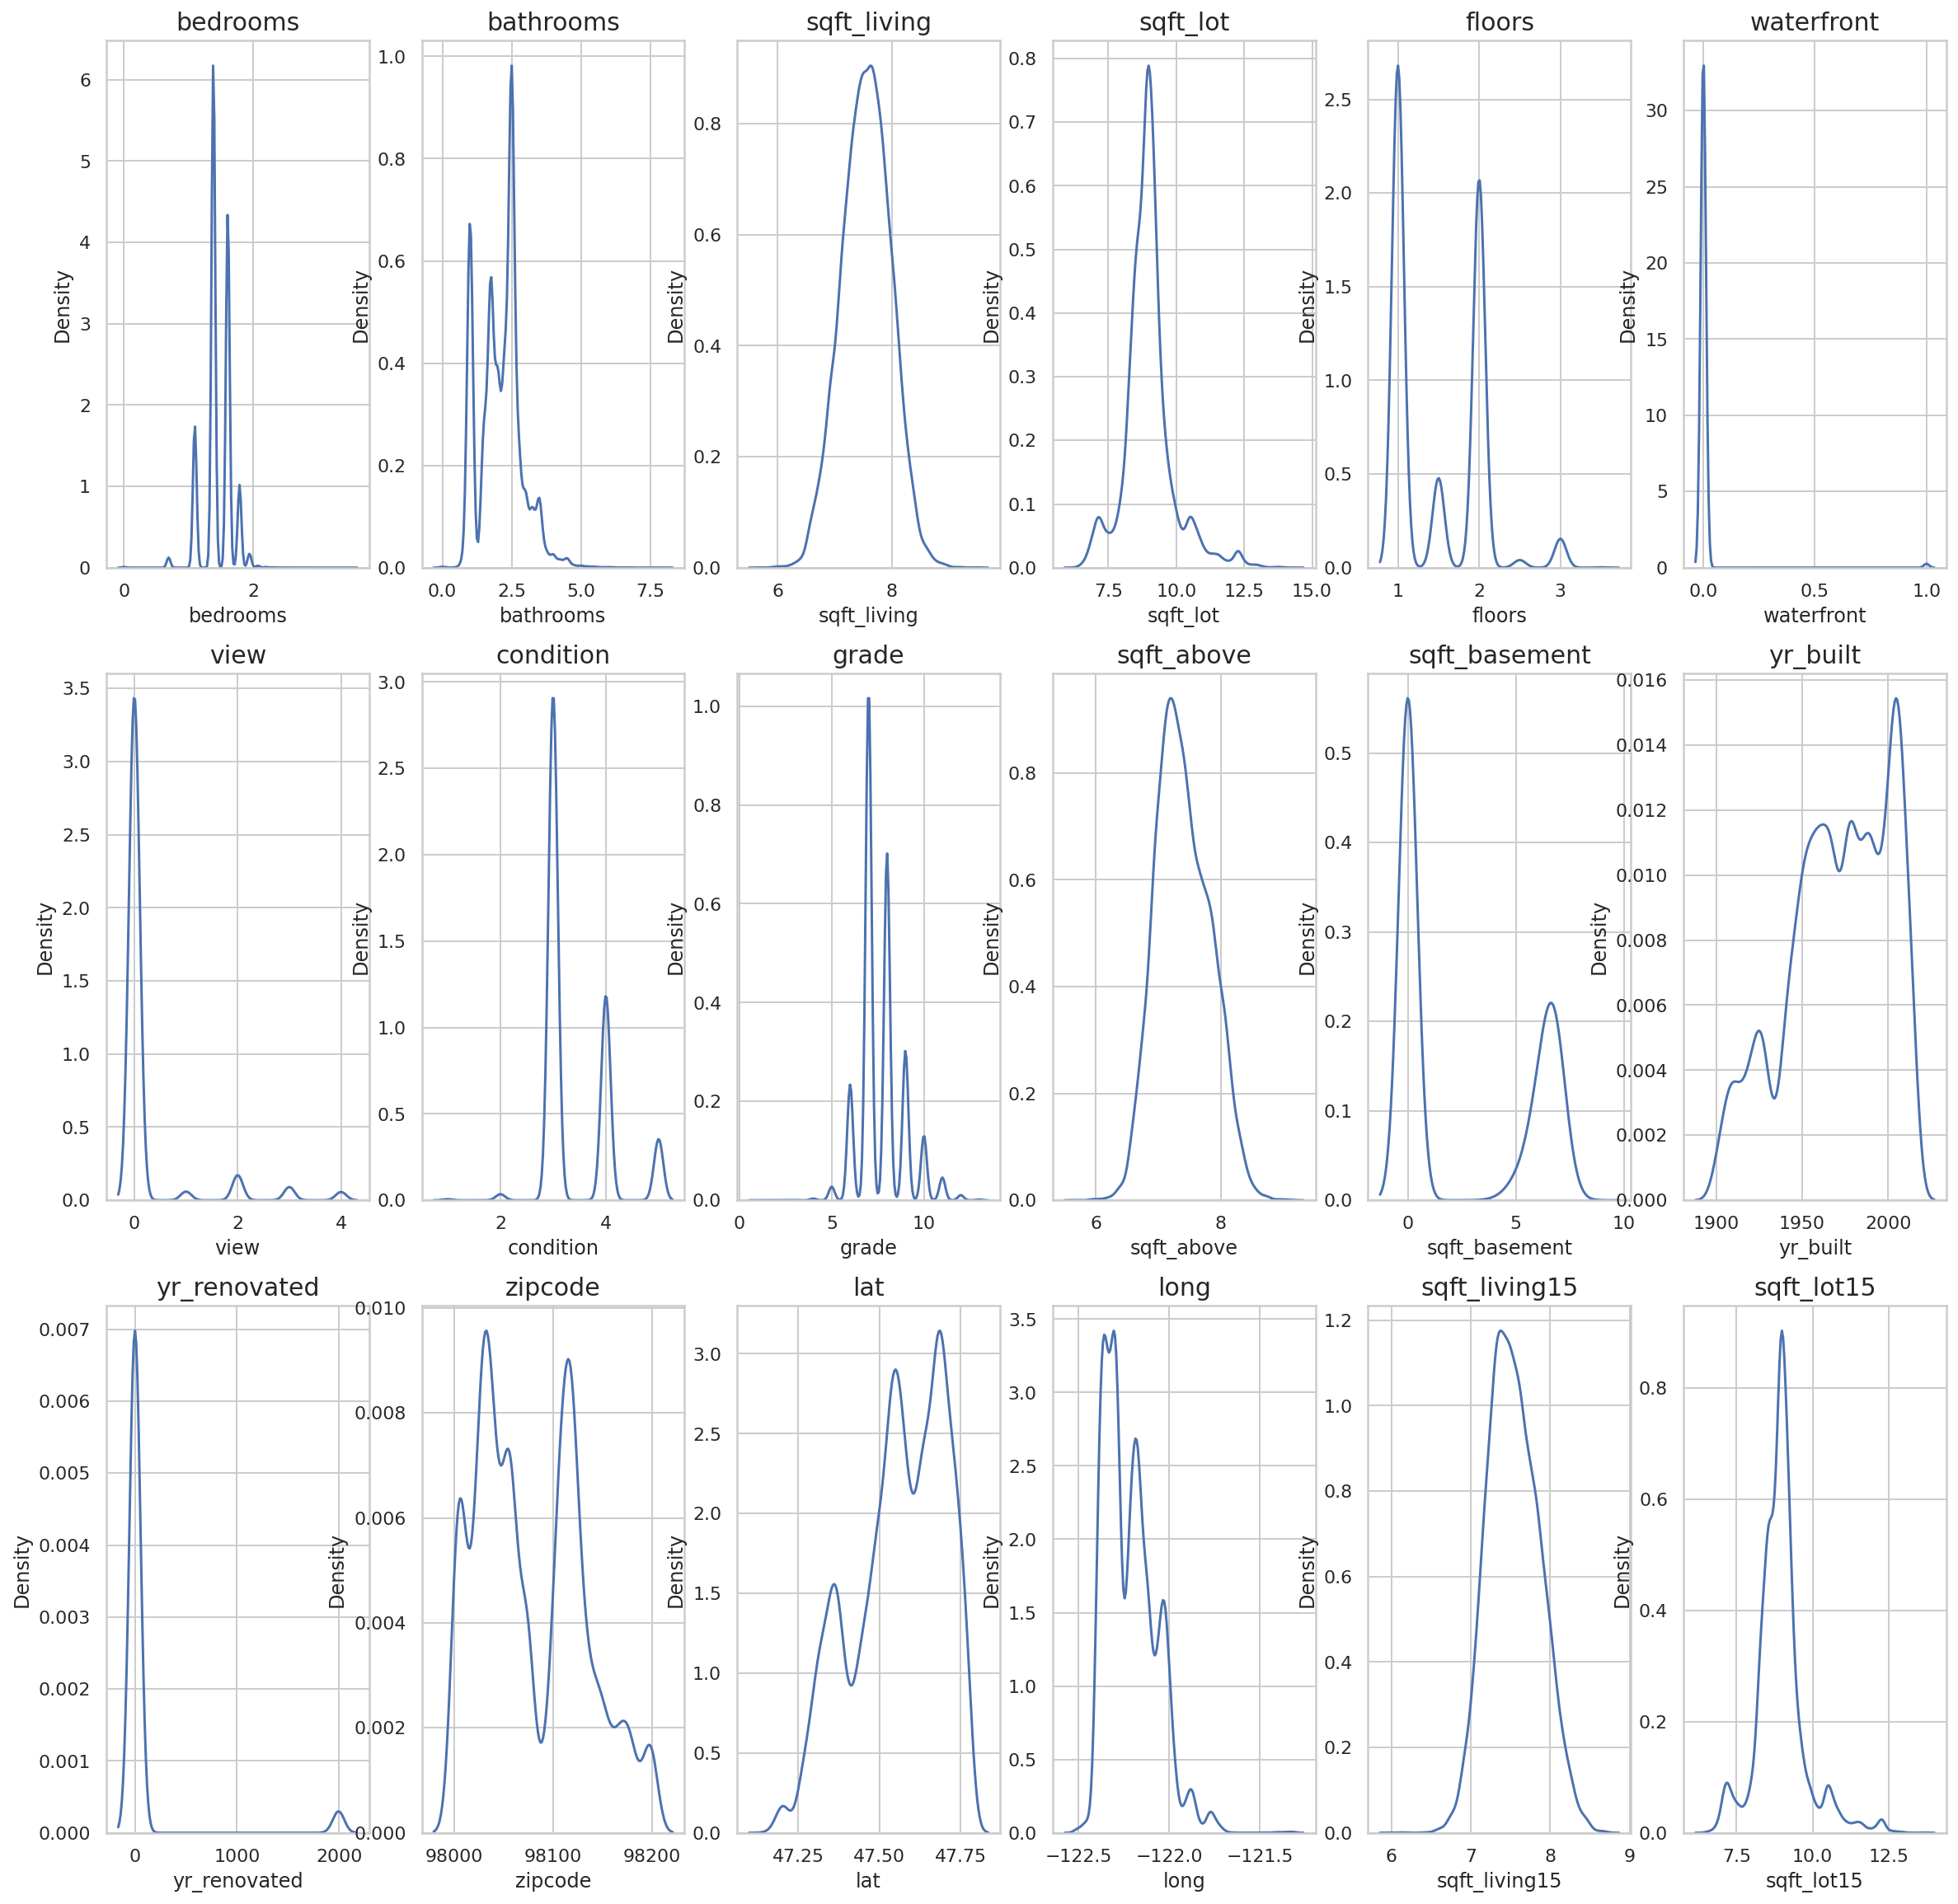

In [23]:
fig, ax = plt.subplots(3, 6, figsize=(20, 20))
# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(3):
    for col in range(6):
        sns.kdeplot(data= data[columns[count]], ax= ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

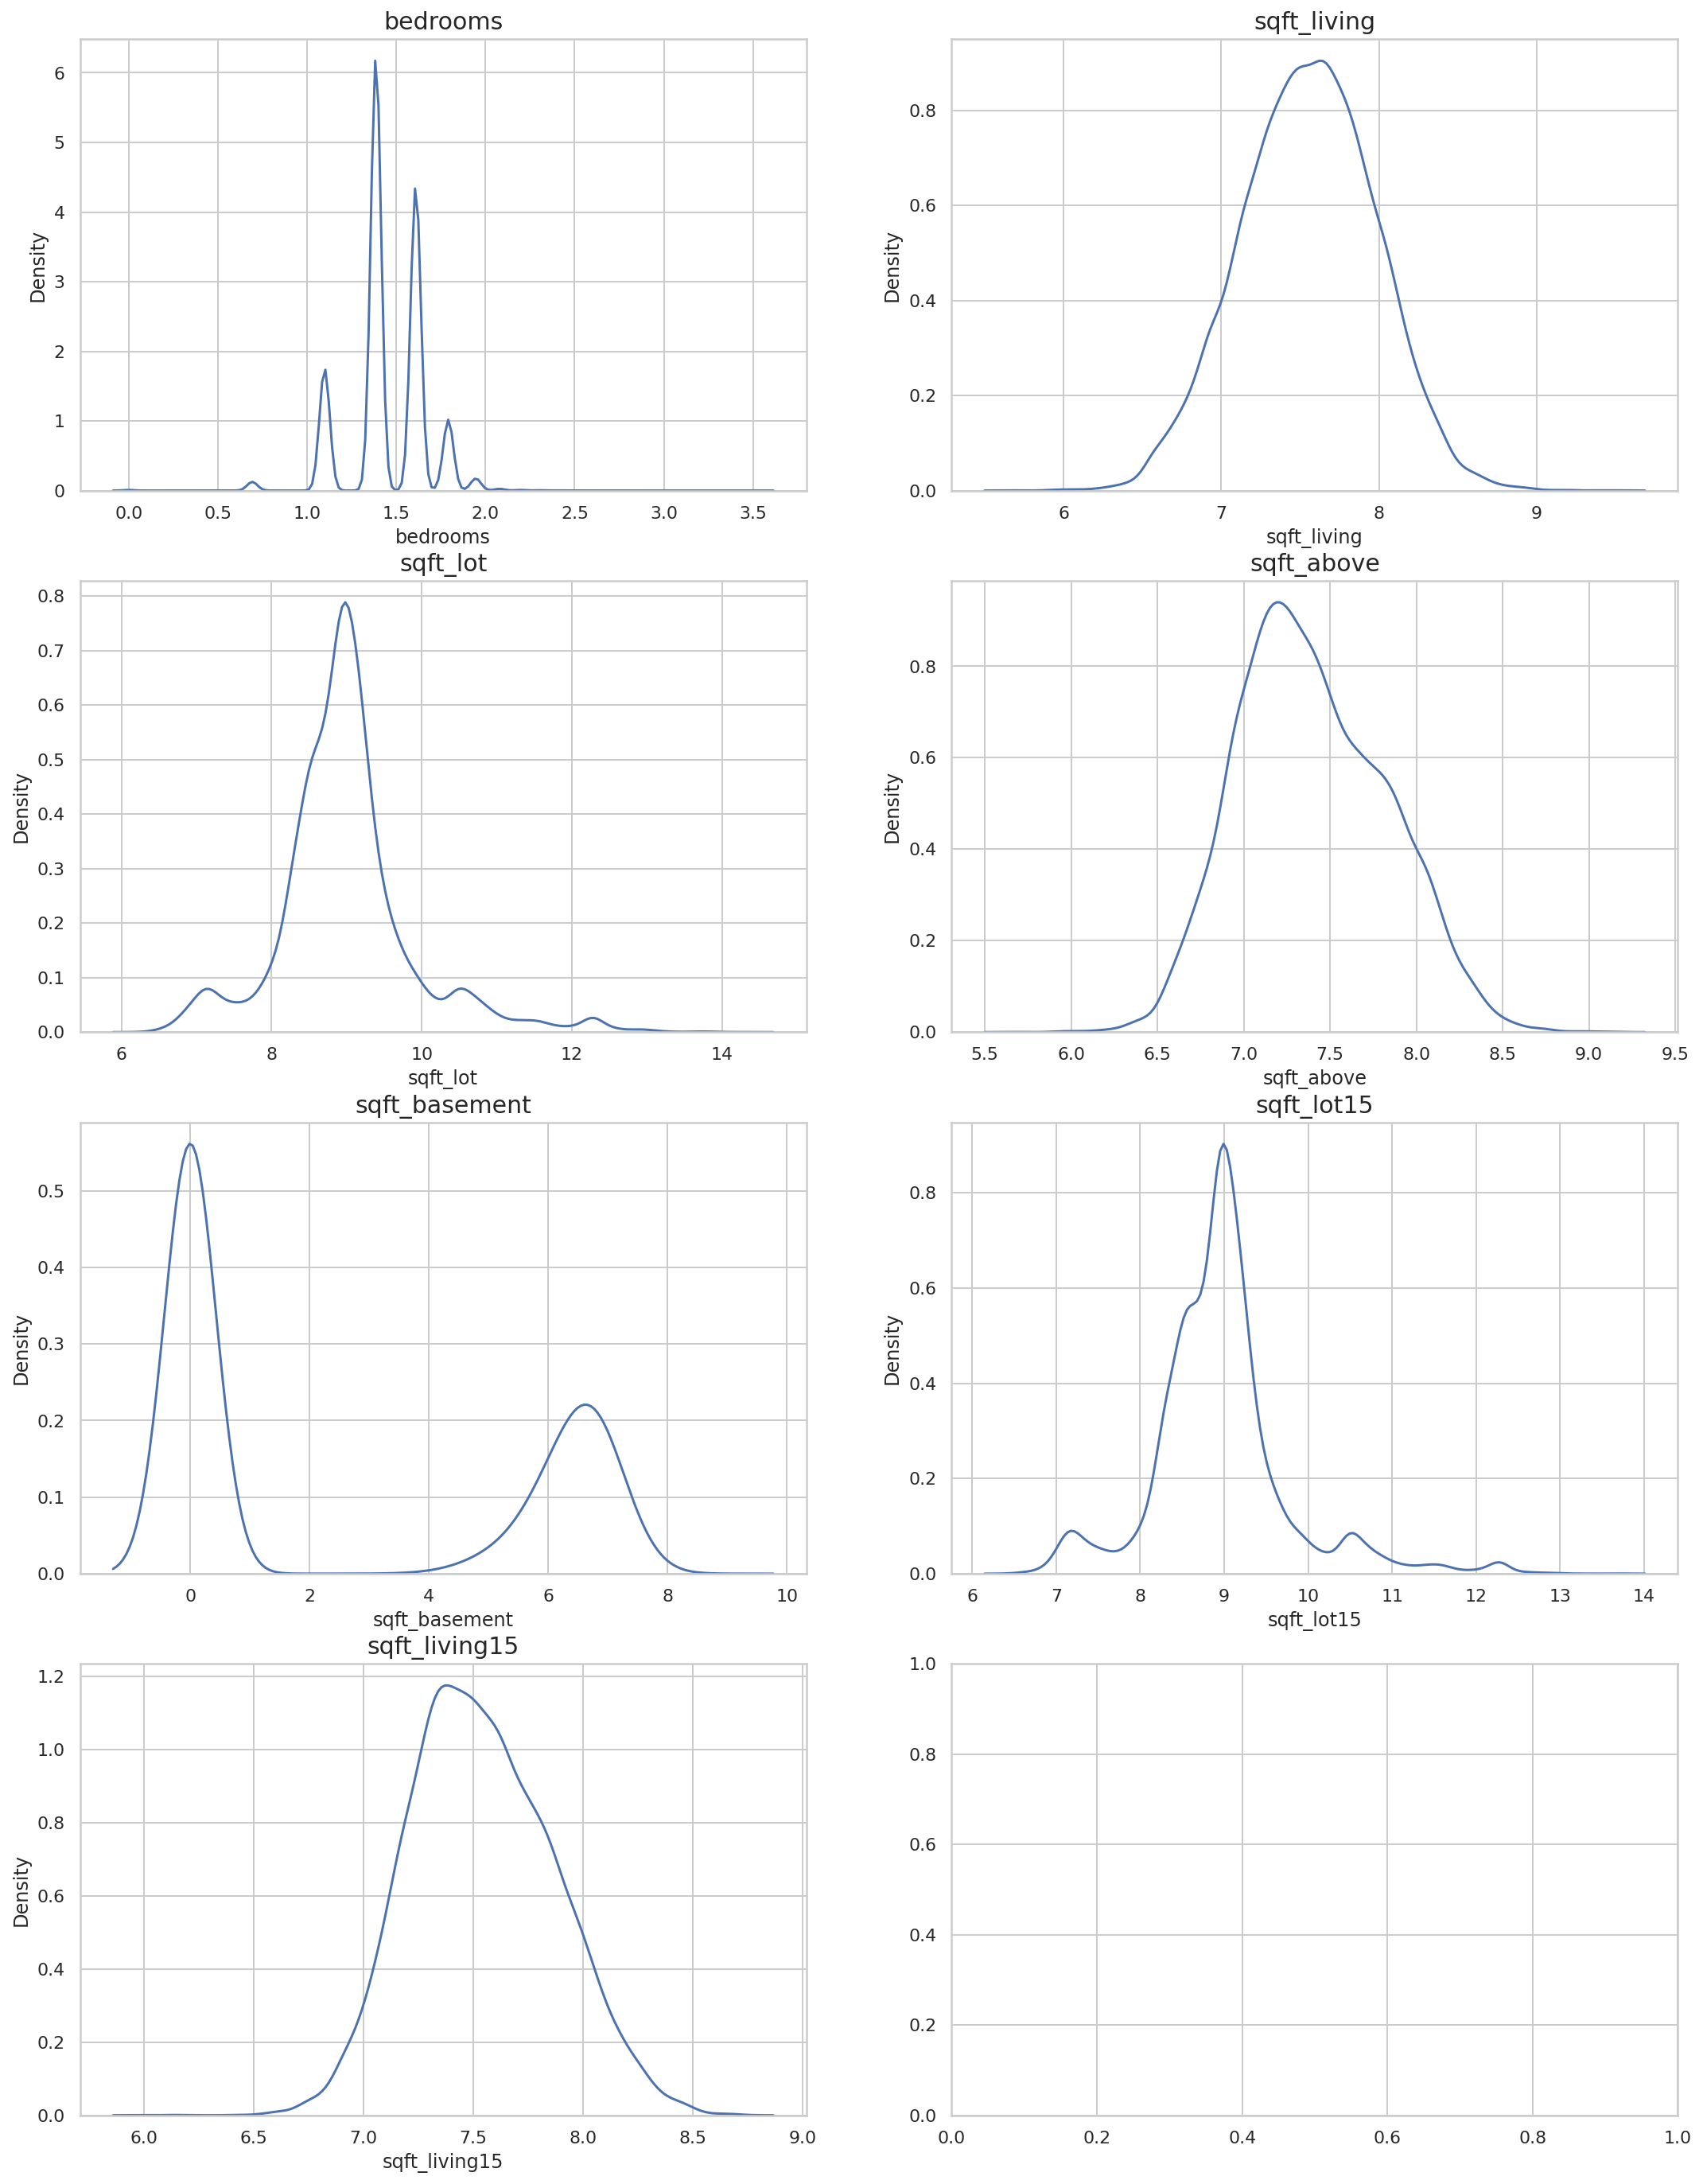

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(18, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

In [25]:
for c in skew_columns:
    data[c] = np.expm1(data[c].values)

Text(0.5, 1.0, 'Price')

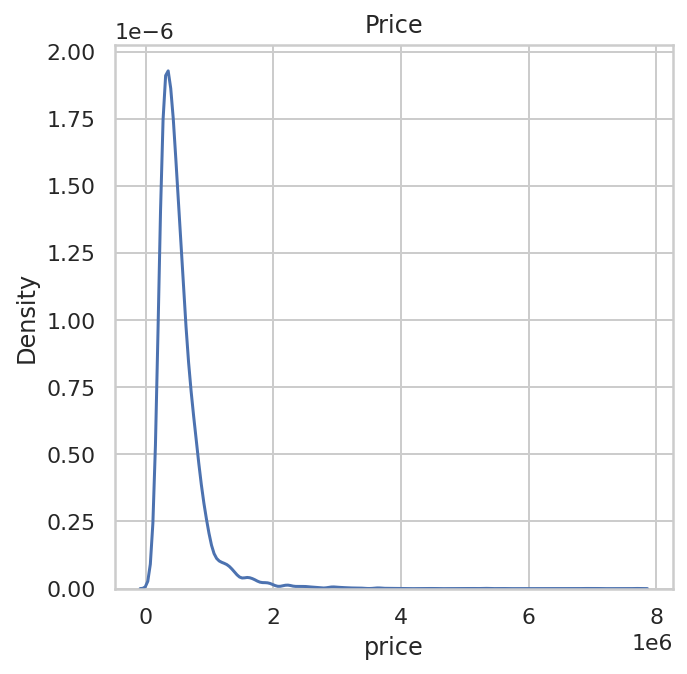

In [26]:
plt.figure(figsize= (5, 5))

sns.kdeplot(data= y);
plt.title("Price")

In [345]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [473]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

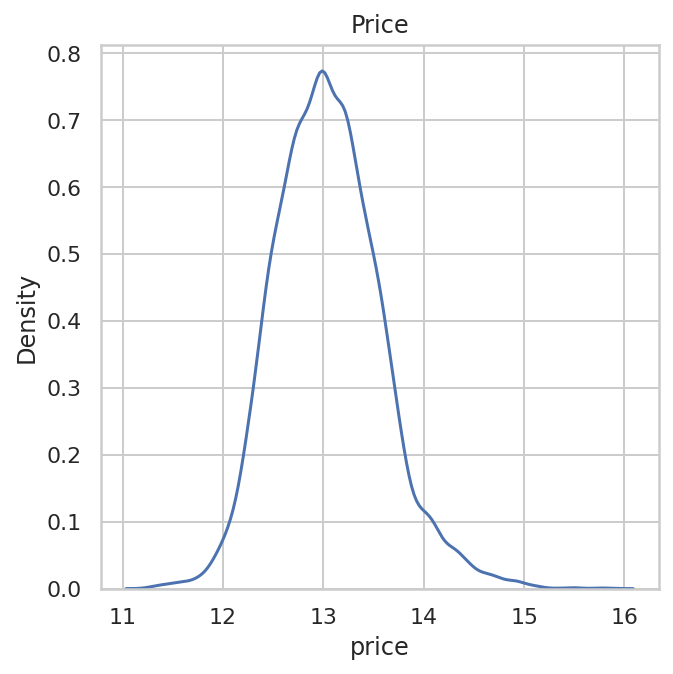

In [29]:
plt.figure(figsize= (5, 5))

plt.title("Price")
sns.kdeplot(data= y);

In [11]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [12]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

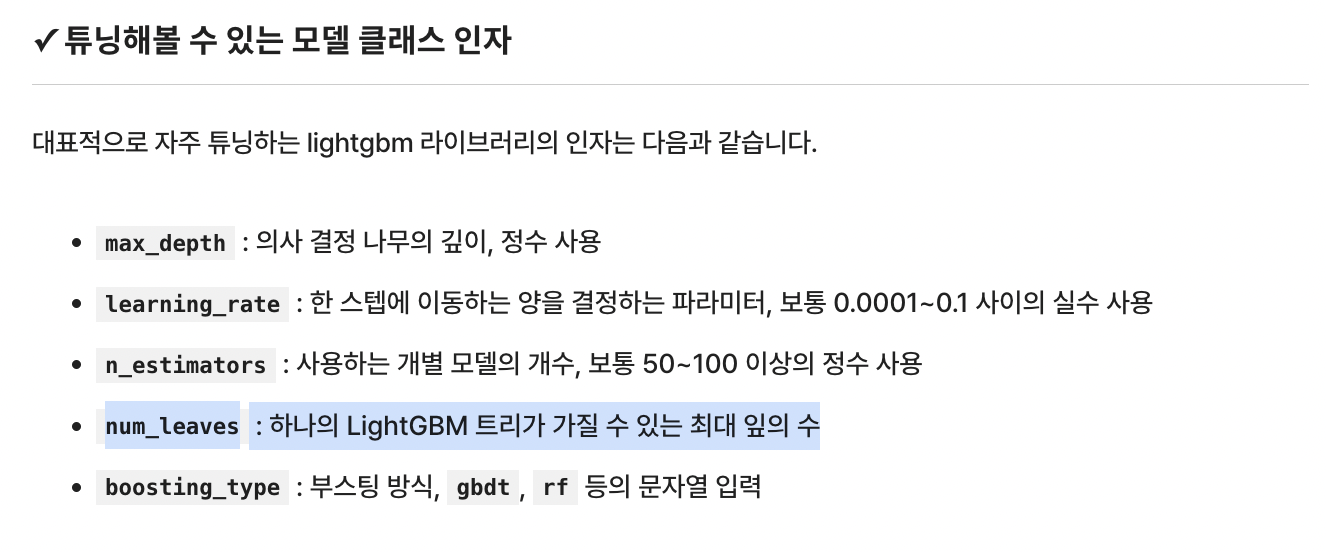

### GradientBoostingRegressor
(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)

### LGBMRegressor
(
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable, NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None,
    n_jobs: int = -1,
    silent: Union[bool, str] = 'warn',
    importance_type: str = 'split',
    **kwargs,
)

### RandomForestRegressor
(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

### xgboost.XGBRegressor
n_estimators  
max_depth  
max_leaves  
learning_rate  
n_jobs  
tree_method  
random_state  
https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [474]:
random_state= 4000
n_estimators= 90
learning_rate= 0.1

In [475]:
gboost = GradientBoostingRegressor(random_state=random_state, n_estimators= n_estimators, learning_rate= learning_rate)
xgboost = XGBRegressor(random_state=random_state, n_estimators= n_estimators, learning_rate= learning_rate)
lightgbm = LGBMRegressor(random_state=random_state,  num_leaves = 62, n_estimators= n_estimators, learning_rate= learning_rate)
rdforest = RandomForestRegressor(random_state=random_state, n_estimators= n_estimators)


models = [gboost, xgboost, lightgbm, rdforest]

In [57]:
gboost.__class__

sklearn.ensemble._gb.GradientBoostingRegressor

In [58]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    X_train, X_test, y_train, y_test = train_test_split(data, y, 
                                                        random_state=random_state, 
                                                        test_size=0.15)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

ValueError: Found input variables with inconsistent numbers of samples: [21503, 15035]

data의 shape = 21503  
y의 shape = 15035  
shape가 않맞았다.

In [17]:
data.shape

(21503, 19)

In [476]:
sub = data.iloc[15035:, :]
x = data.iloc[:15035, :]

In [350]:
x.shape

(15035, 17)

In [351]:
y.shape

(15035,)

In [435]:
def get_scores(models, x, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                            random_state=random_state, 
                                                            test_size=0.03)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, x, y)

RMSE
GradientBoostingRegressor  101694.590098
RandomForestRegressor      101010.054076
XGBRegressor                91330.426751
LGBMRegressor               88255.981150

In [477]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        random_state=random_state, 
                                                        test_size=0.03)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 101694.59009819821,
 'XGBRegressor': 91330.42675139681,
 'LGBMRegressor': 88255.98114961892,
 'RandomForestRegressor': 101010.05407619571}

In [388]:
score_df

RMSE
GradientBoostingRegressor  101694.590098
RandomForestRegressor      101010.054076
XGBRegressor                91330.426751
LGBMRegressor               88255.981150

In [19]:
from sklearn.model_selection import GridSearchCV

In [478]:
model1 = LGBMRegressor(random_state= 40000,  num_leaves = 62, n_estimators= 90, learning_rate= 0.1)

In [479]:
param_grid = {
    'n_estimators': [90, 95],
    'max_depth': [5 ,22],
}

In [480]:
grid_model = GridSearchCV(model1, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv= 15 , verbose= 1, n_jobs= 5)

grid_model.fit(x, y)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


GridSearchCV(cv=15,
             estimator=LGBMRegressor(n_estimators=90, num_leaves=62,
                                     random_state=40000),
             n_jobs=5,
             param_grid={'max_depth': [5, 22], 'n_estimators': [90, 95]},
             scoring='neg_mean_squared_error', verbose=1)

In [481]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 5, 'n_estimators': 90},
 {'max_depth': 5, 'n_estimators': 95},
 {'max_depth': 22, 'n_estimators': 90},
 {'max_depth': 22, 'n_estimators': 95}]

In [482]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.0286884 , -0.02850608, -0.02632906, -0.02625018])

In [483]:
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          5            90 -0.028688
1          5            95 -0.028506
2         22            90 -0.026329
3         22            95 -0.026250

In [484]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          5            90 -0.028688  0.169377
1          5            95 -0.028506  0.168837
2         22            90 -0.026329  0.162262
3         22            95 -0.026250  0.162019

In [485]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          5            90 -0.028688  0.169377
1          5            95 -0.028506  0.168837
2         22            90 -0.026329  0.162262
3         22            95 -0.026250  0.162019

In [486]:
results.sort_values(by= "RMSLE", ascending= True, inplace= True)

In [487]:
results

max_depth  n_estimators     score     RMSLE
3         22            95 -0.026250  0.162019
2         22            90 -0.026329  0.162262
1          5            95 -0.028506  0.168837
0          5            90 -0.028688  0.169377

In [488]:
model = LGBMRegressor(random_state= 4000,  num_leaves = 62, n_estimators= 90, learning_rate= 0.1)
model.fit(x, y)
prediction = model.predict(sub)
prediction

array([13.10577347, 13.09377599, 14.16440729, ..., 13.042718  ,
       12.71359595, 13.03500201])

점수 낮추기 실패다 이 방식은 캐글에서 인식 조차하지 않는다.

gboost = GradientBoostingRegressor(random_state=random_state, n_estimators= n_estimators, learning_rate= learning_rate)
xgboost = XGBRegressor(random_state=random_state, n_estimators= n_estimators, learning_rate= learning_rate)
lightgbm = LGBMRegressor(random_state=random_state,  num_leaves = 62, n_estimators= n_estimators, learning_rate= learning_rate)
rdforest = RandomForestRegressor(random_state=random_state, n_estimators= n_estimators)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}, {'model':rdforest, "name":"RandomForest"}]

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

y_pred = AveragingBlending(models, x, y, sub)

sub_id.shape

sub_id = sub_id[:6468]

sub_id.shape

y_pred.shape

sub = pd.DataFrame(data={'id':sub_id, 'price':y_pred})

sub

sub.to_csv('submission123.csv', index=False)

In [489]:
prediction = np.expm1(prediction)
prediction

array([ 491772.4720652 ,  485907.68417649, 1417501.79610787, ...,
        461720.87993775,  332233.37479393,  458171.94888122])

In [490]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission

id   price
0     15035  100000
1     15036  100000
2     15037  100000
3     15038  100000
4     15039  100000
...     ...     ...
6463  21498  100000
6464  21499  100000
6465  21500  100000
6466  21501  100000
6467  21502  100000

[6468 rows x 2 columns]

In [491]:
submission['price'] = prediction

In [492]:
submission

id         price
0     15035  4.917725e+05
1     15036  4.859077e+05
2     15037  1.417502e+06
3     15038  3.011788e+05
4     15039  3.316859e+05
...     ...           ...
6463  21498  2.401202e+05
6464  21499  3.769246e+05
6465  21500  4.617209e+05
6466  21501  3.322334e+05
6467  21502  4.581719e+05

[6468 rows x 2 columns]

In [493]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.162019')
submission.to_csv(submission_csv_path, index=False)

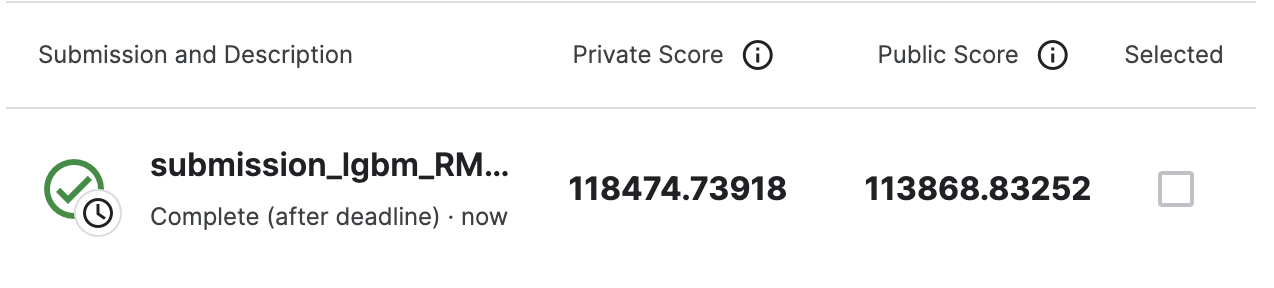

# 회고

캐글에서 데이터를 가져와서 train.scv & test.csv의 info를 찍어보니 price열이 빠진것을 보고  
price 열이 target으로 판단이 되어서 진행을 하였습니다.  
약간의 전처리 과정을 하였고 결측치를 확인해도 없었기에 상관관계도 확인해보고 heatmap도 찍어보아  
약간의 상관관계에서 벗어났다고 판단이되었던 zipcode & long 열도 없애보고면서 진행해보았지만 결국 rmse 값을 낮추지를 못해서 다시 원점으로 돌아와서 시작했습니다.  
LGBMRegressor의 파라미터 값도 변경하여 최적이라고 판단이 되어서 진행을 하였지만 제가 원했던 결과와 다소 다르게 나왔습니다.  

그렇게 시간이 흐르고 해결이 되지 않아 이미 하고자 하는 의욕자체가 사라져서  
새로운 정보를 알게되어도 검색하고 싶지 않고 찾고싶지 않고 
스트레스가 쌓여서 몸에서 경련이 일어나서 포기한 과제입니다.  

P.S 이마에다 계란 후라이 구울 수 있을 지도?! 사요나라